# PyTorch快速入门

## PyTorch简介
PyTorch 是一个由 Facebook 于 2016 年推出的基于Python的开源机器学习和深度学习框架。现如今，Pytorch已经成为开源机器学习框架中，在科研领域市场占有率最高的框架，其在AI顶会上的占比在2022年已达80％。目前，许多深度学习软件和项目，如 Tesla Autopilot、Hugging Face 的 Transformers等，都是基于 PyTorch 开发的。

PyTorch 的两大核心特性是：

- 张量计算：性能与 NumPy 相当，并可以通过 GPU 加速以提高计算效率。
- 自动微分：使用户能够轻松地构建和训练深度神经网络。

## 1. 安装 PyTorch
在开始之前，请确保您已经安装了 PyTorch。您可以从 [PyTorch 官网](https://pytorch.org/get-started/locally/) 获取安装说明。

![pytorch下载](pytorch下载.png)

In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


## 2. 导入库
首先，我们需要导入 PyTorch 和其他相关库。

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np

## 3. 张量（Tensors）

### 3.1、 创建张量
张量是 PyTorch 的基本数据结构，类似于 NumPy 数组。它们可以在 GPU 上进行高效计算。张量可以表示标量、向量、矩阵或更高维度的数组。

In [3]:
# 创建一个零维张量（标量）
zero_dim_tensor = torch.tensor(42, dtype=torch.float)
print("0D tensor (scalar):", zero_dim_tensor)
print("0D tensor (scalar) shape:", zero_dim_tensor.shape)

# 创建一个一维张量
one_dim_tensor = torch.tensor([1, 2, 3])
print("\n1D tensor:", one_dim_tensor)
print("1D tensor shape:", one_dim_tensor.shape)

# 创建一个二维张量
two_dim_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
print("\n2D tensor:", two_dim_tensor)
print("2D tensor shape:", two_dim_tensor.shape)

# 创建一个三维张量
three_dim_tensor = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("\n3D tensor:", three_dim_tensor)
print("3D tensor shape:", three_dim_tensor.shape)

# 指定形状创建tensor：创建一个形状为 (3, 3) 且数据类型为 float32 的随机张量
random_tensor = torch.randn(3, 3, dtype=torch.float32)
print("\nRandom tensor with shape (3, 3) and dtype float32:\n", random_tensor)
print("Random tensor with shape:\n", random_tensor.shape)

0D tensor (scalar): tensor(42.)
0D tensor (scalar) shape: torch.Size([])

1D tensor: tensor([1, 2, 3])
1D tensor shape: torch.Size([3])

2D tensor: tensor([[1, 2, 3],
        [4, 5, 6]])
2D tensor shape: torch.Size([2, 3])

3D tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
3D tensor shape: torch.Size([2, 2, 2])

Random tensor with shape (3, 3) and dtype float32:
 tensor([[ 0.9189, -2.0569,  1.1952],
        [-1.4813, -1.1395, -0.4313],
        [-1.4738, -0.3755,  1.0565]])
Random tensor with shape:
 torch.Size([3, 3])


### [更多Tensor相关的函数](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

### 3.2、GPU运行
```
.to()方法
```

In [4]:
if torch.cuda.is_available():
    tensor = two_dim_tensor.to("cuda")
    print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]], device='cuda:0')


### 3.3、索引与切片常用操作

#### 索引

- `tensor[i]`
  * 获取指定索引 i 的元素。

- `tensor[i:j]`
  * 获取索引 i 到 j（不包括 j）之间的元素。

- `tensor[:j]`
  * 获取索引 0 到 j（不包括 j）之间的元素。

- `tensor[-1]`
  * 获取最后一个元素。

- `tensor[:, i]`
  * 获取指定列 i 的所有元素。

- `tensor[i, :]`
  * 获取指定行 i 的所有元素。

#### 切片

- `tensor[start:end:step]`
  * 获取指定范围内的元素，步长由参数 step 指定。

- `tensor.flip(1)`
  * 反转张量。

#### 高级索引

- `tensor[[i, j, k], [row_i, row_j, row_k]]`
  * 使用整数索引列表选取元素。

- `tensor[[i, j, k], :]`
  * 使用整数索引列表选取行。

- `tensor[:, [col_i, col_j, col_k]]`
  * 使用整数索引列表选取列。

#### view 和 reshape

- `tensor.view(new_shape)`
  * 改变张量的形状，保持元素数量不变。

- `tensor.reshape(new_shape)`
  * 改变张量的形状，自动计算元素数量。

In [5]:
# 创建一个 3x3 张量
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Original tensor:")
print(tensor)

# 选择第 i=0, j=2行
i = 0
j = 2
selected_rows = tensor[[i, j], :]
print("\nSelected rows:")
print(selected_rows)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Selected rows:
tensor([[1, 2, 3],
        [7, 8, 9]])


In [6]:
# 创建一个 3x3 张量
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Original tensor:")
print(tensor)

# 沿行轴翻转张量
reversed_tensor = tensor.flip(0)
print("\nReversed tensor:")
print(reversed_tensor)

Original tensor:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Reversed tensor:
tensor([[7, 8, 9],
        [4, 5, 6],
        [1, 2, 3]])


### 3.4、Tensor与Numpy Array相互转换
```
torch.from_numpy创建的tensor与原array共享内存
tensor.numpy创建的numpy与原tensor共享内存
```

In [7]:
# 创建一个 NumPy 数组
np_array = np.array([[1, 2, 3], [4, 5, 6]])

# 从 NumPy 数组创建 PyTorch 张量
tensor_from_np = torch.from_numpy(np_array)
print("Tensor from NumPy array:\n", tensor_from_np)

# 创建一个 PyTorch 张量
tensor = torch.tensor([[7, 8, 9], [10, 11, 12]])

# 将 PyTorch 张量转换为 NumPy 数组
np_array_from_tensor = tensor.numpy()
print("\nNumPy array from tensor:\n", np_array_from_tensor)

Tensor from NumPy array:
 tensor([[1, 2, 3],
        [4, 5, 6]])

NumPy array from tensor:
 [[ 7  8  9]
 [10 11 12]]


**请注意，张量和原始 NumPy 数组共享相同的底层内存。这意味着，如果在创建张量之后修改了原始数组或张量，另一个也会被更新。在某些情况下，这可能导致不希望出现的副作用。为了避免这种情况，可以使用 torch.tensor() 方法创建一个新的副本。**

### 3.5、Tensor的基本运算

In [8]:
# 创建两个 2x2 张量
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

print("a: \n", a)
print("b: \n", b)

# 加法
add_result = a + b
print("Addition result:")
print(add_result)

# 减法
sub_result = a - b
print("\nSubtraction result:")
print(sub_result)

# 乘法（逐元素相乘）
mul_result = a * b
print("\nMultiplication result (element-wise):")
print(mul_result)

# 除法（逐元素相除）
div_result = a / b
print("\nDivision result (element-wise):")
print(div_result)

# 矩阵乘法
matmul_result1 = torch.matmul(a, b)
matmul_result2 = a @ b
print("\nMatrix multiplication result:")
print(matmul_result1)
print(matmul_result2)

a: 
 tensor([[1, 2],
        [3, 4]])
b: 
 tensor([[5, 6],
        [7, 8]])
Addition result:
tensor([[ 6,  8],
        [10, 12]])

Subtraction result:
tensor([[-4, -4],
        [-4, -4]])

Multiplication result (element-wise):
tensor([[ 5, 12],
        [21, 32]])

Division result (element-wise):
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])

Matrix multiplication result:
tensor([[19, 22],
        [43, 50]])
tensor([[19, 22],
        [43, 50]])


### 4.自动微分（Autograd）
PyTorch 的自动微分功能可以自动计算梯度，无需手动计算。
#### 4.1、$y=x^2$自动求导

In [9]:
# 创建一个张量并设置 requires_grad=True
x = torch.tensor(3.0, requires_grad=True)

# 定义函数 y = x^2
y = x ** 2

# 计算梯度
y.backward()

# 获取梯度值
gradient = x.grad
print("Gradient of y = x^2 at x =", x.item(), "is:", gradient.item())

Gradient of y = x^2 at x = 3.0 is: 6.0


#### 4.2、$r=x^2 + y^2$自动求导

In [10]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(0.5, requires_grad=True)
r = x**2 + y ** 2
print(r)

tensor(1.2500, grad_fn=<AddBackward0>)


In [11]:
# 查看各变量是否支持求导
print(x.requires_grad)
print(y.requires_grad)
print(r.requires_grad)

True
True
True


In [12]:
# 查看各变量导数大小。此时因为还没有反向传播，因此导数都不存在
print(x.grad.item())
print(y.grad.item())

AttributeError: 'NoneType' object has no attribute 'item'

In [ ]:
# 反向传播求导
r.backward()
print(x.grad.item())
print(y.grad.item())

In [13]:
# 反向传播求导，导数值会累积的。重复运行相同命令，grad会增加。
r = x**2 + y ** 2
r.backward()
print(x.grad.item())
print(y.grad.item())

2.0
1.0


#### 4.3、$y=\sin(x)$自动求导

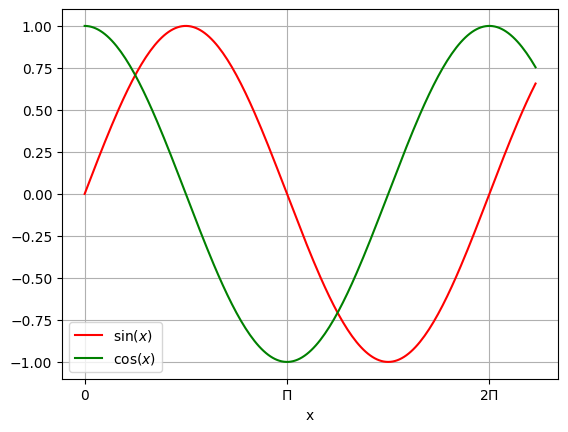

In [14]:
import matplotlib.pyplot as plt

# 创建一个张量 x，范围从 0 到 7，包含 200 个点，并设置 requires_grad=True 以计算梯度
x = torch.tensor(np.linspace(0, 7, 200), requires_grad=True)
# 计算 y = sin(x) 的值
Y = torch.sin(x)
# 计算 y 的总和
y = torch.sum(Y)
# 计算 y 关于 x 的梯度
y.backward()

# 创建一个包含一个子图的图形
fig, ax = plt.subplots()

# 绘制函数曲线 y = sin(x)，颜色为红色
function_line, = ax.plot(x.detach().numpy(), Y.detach().numpy(), label='$\sin(x)$', color="red")
# 绘制导数曲线 dy/dx = cos(x)，颜色为绿色
derivative_line, = ax.plot(x.detach().numpy(), x.grad.detach().numpy(), label='$\cos(x)$', color="green")

# 设置 x 轴标签
ax.set_xlabel('x')
# 设置刻度和刻度标签
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\Pi$', '$2\Pi$'])

# 显示图例
ax.legend()
# 添加网格线
ax.grid(True)

# 显示图形
plt.show()

### 5.[神经网络（Neural Networks）](https://machinelearningmastery.com/building-a-regression-model-in-pytorch/)
PyTorch 提供了一个高级 API，用于定义和训练神经网络。您可以使用 nn.Module 类创建自定义网络，并通过继承该类并重写 forward() 方法来实现网络的前向传播。

In [15]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print(data.feature_names)

X, y = data.data, data.target

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [16]:
print("X: ", X.shape)
print("y: ", y.shape)

X:  (20640, 8)
y:  (20640,)


本文采用的神经网络架构：5层全连接神经网络。输入层8个神经元，第2、3、4层分别24，12和6个神经元。输出层1个神经元。

<img src="nn.svg" alt="神经网络架构" width="1400" height="800" />

In [48]:
import torch.nn as nn

# 定义神经网络架构
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(), # 激活函数：1、增加模型的非线性；2、解决梯度消失和梯度爆炸问题；3、某些激活函数具有正则化效果；4、引入层次化特征。
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

model

Sequential(
  (0): Linear(in_features=8, out_features=24, bias=True)
  (1): ReLU()
  (2): Linear(in_features=24, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=6, bias=True)
  (5): ReLU()
  (6): Linear(in_features=6, out_features=1, bias=True)
)

In [45]:
import torch.optim as optim

# 定义损失函数和优化器
loss_fn = nn.MSELoss()  # 平方误差
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 优化算法，学习率0.0001

#### 5.1、[CPU上训练模型](https://machinelearningmastery.com/building-a-regression-model-in-pytorch/)

In [46]:
import copy
import time
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# 训练参数
n_epochs = 100   # 运行的epoch数
batch_size = 10  # 每个批次的大小
batch_start = torch.arange(0, len(X_train), batch_size)

# 保存最佳模型
best_mse = np.inf   # 初始化为无穷大
best_weights = None
history = []

t1 = time.time()

# 训练循环
for epoch in range(n_epochs):
    # 将模型设置为训练模式，在下面循环中，模型将进行权重更新
    model.train()
    # 使用tqdm库创建一个进度条，用于展示训练过程中各epoch的进度。batch_start作为批次起始索引，mininterval=0取消进度条更新间隔的限制，disable=True禁用进度条的功能。
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        # 设置进度条的描述为当前epoch的编号
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # 取一个批次
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # 前向传播，model(X_batch)等同于model.forward(X_batch)
            # 在Python中，当你定义一个类并在其中实现__call__方法时，这个类的实例可以像函数一样被调用。在PyTorch中，torch.nn.Module类已经实现了__call__方法，这使得我们可以直接通过模型实例调用前向计算。
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            # 更新权重
            optimizer.step()
            # 显示当前批次的损失值
            bar.set_postfix(mse=float(loss))
    # 在每个epoch结束时评估准确率
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        # 将当前模型的权重复制到最佳权重变量中
        best_weights = copy.deepcopy(model.state_dict())

# 恢复模型并返回最佳准确率
model.load_state_dict(best_weights)

t2 = time.time()
print("总计用时：{}s.".format(t2-t1))

总计用时：191.67503142356873s.


MSE: 1.30
RMSE: 1.14


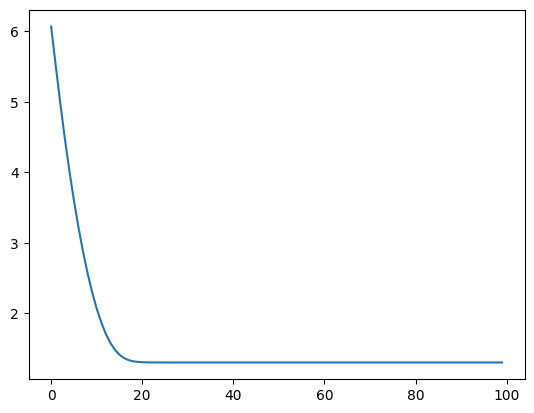

In [47]:
import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

#### 5.2、GPU上训练模型

In [36]:
import copy
import time
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# 确定用于运行代码的设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义神经网络架构
model = nn.Sequential(
    nn.Linear(8, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
).to(device)

# 定义损失函数和优化器
loss_fn = nn.MSELoss()  # 平方误差
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 优化算法，学习率0.0001

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device).reshape(-1, 1)

# 训练参数
n_epochs = 500   # 运行的epoch数
batch_size = 100  # 每个批次的大小
batch_start = torch.arange(0, len(X_train), batch_size)

# 保存最佳模型
best_mse = np.inf   # 初始化为无穷大
best_weights = None
history = []

t1 = time.time()
# 训练循环
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # 取一个批次
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # 前向传播
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            # 更新权重
            optimizer.step()
            # 打印进度
            bar.set_postfix(mse=float(loss))
    # 在每个epoch结束时评估准确率
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# 恢复模型并返回最佳准确率
model.load_state_dict(best_weights)

t2 = time.time()
print("总计用时：{}s.".format(t2-t1))

总计用时：95.04457306861877s.


MSE: 0.49
RMSE: 0.70


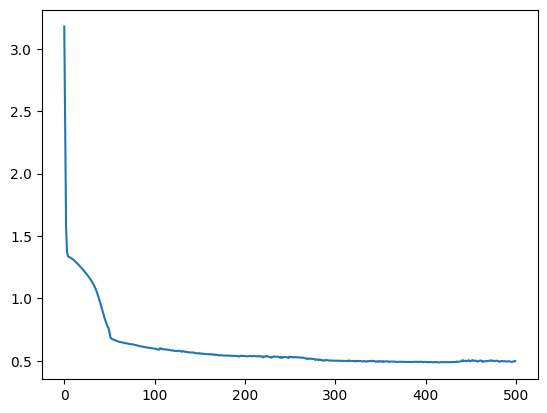

In [37]:
import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [38]:
class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(8, 24)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(24, 12)
        self.linear3 = torch.nn.Linear(12, 6)
        self.linear4 = torch.nn.Linear(6, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        x = self.activation(x)
        x = self.linear4(x)
        return x

model = TinyModel()

In [39]:
import copy
import time
import numpy as np
import torch
import tqdm
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# 确定用于运行代码的设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

# 定义损失函数和优化器
loss_fn = nn.MSELoss()  # 平方误差
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 优化算法，学习率0.0001

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device).reshape(-1, 1)

# 训练参数
n_epochs = 500   # 运行的epoch数
batch_size = 100  # 每个批次的大小
batch_start = torch.arange(0, len(X_train), batch_size)

# 保存最佳模型
best_mse = np.inf   # 初始化为无穷大
best_weights = None
history = []

t1 = time.time()
# 训练循环
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        # 设置进度条的描述为当前epoch的编号
        bar.set_description(f"Epoch {epoch}") 
        for start in bar:
            # 取一个批次
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # 前向传播
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            # 更新权重
            optimizer.step()
            # 显示当前批次的损失值
            bar.set_postfix(mse=float(loss))
    # 在每个epoch结束时评估准确率
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# 恢复模型并返回最佳准确率
model.load_state_dict(best_weights)

t2 = time.time()
print("总计用时：{}s.".format(t2-t1))

总计用时：95.45646357536316s.


MSE: 0.49
RMSE: 0.70


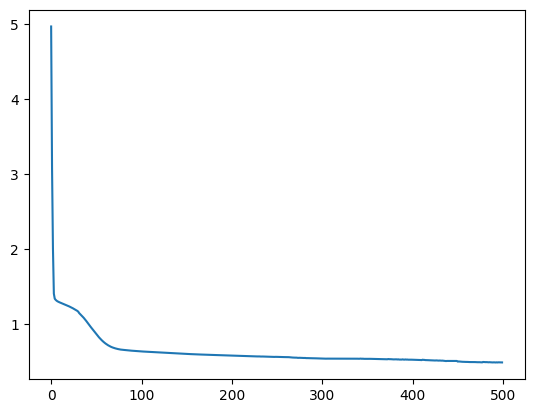

In [40]:
import matplotlib.pyplot as plt
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [41]:
model

TinyModel(
  (linear1): Linear(in_features=8, out_features=24, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=24, out_features=12, bias=True)
  (linear3): Linear(in_features=12, out_features=6, bias=True)
  (linear4): Linear(in_features=6, out_features=1, bias=True)
)

## 总结
PyTorch 是一个功能强大且易于使用的机器学习框架，适用于各种深度学习任务。本简介涵盖了 PyTorch 的一些核心概念，如张量、自动微分、神经网络、损失函数、优化器以及 GPU 支持。要深入了解 PyTorch 的更多功能和用法，请参阅 PyTorch 官方文档 和相关教程。

## 补充：自定义数据集

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.datasets import fetch_california_housing

# 加载加利福尼亚房价数据集
data = fetch_california_housing()
print(data.feature_names)

# 提取特征和目标变量
X, y = data.data, data.target

# 自定义数据集类，包含归一化处理
class CustomDataset(Dataset):
    def __init__(self, data, labels, normalize='min_max'):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.normalize = normalize
        
        # 根据选择的归一化方法进行预处理
        if normalize == 'min_max':
            self.data_min = torch.min(self.data)
            self.data_max = torch.max(self.data)
        elif normalize == 'standard':
            self.data_mean = torch.mean(self.data)
            self.data_std = torch.std(self.data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        
        # 执行归一化
        if self.normalize == 'min_max':
            x = (x - self.data_min) / (self.data_max - self.data_min)
        elif self.normalize == 'standard':
            x = (x - self.data_mean) / self.data_std
        
        return x, y

# 数据归一化方法可以选择 'min_max' 或 'standard'
normalize_method = 'min_max'  # 或者 'standard'

# 创建自定义数据集实例，并指定归一化方法
dataset = CustomDataset(X, y, normalize=normalize_method)

# 划分数据集为训练集和测试集
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# 创建训练集和测试集的DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 显示训练集特征和标签的批次形状
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature batch shape: torch.Size([32, 8])
Labels batch shape: torch.Size([32])
